In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/incident_event_logdata.csv


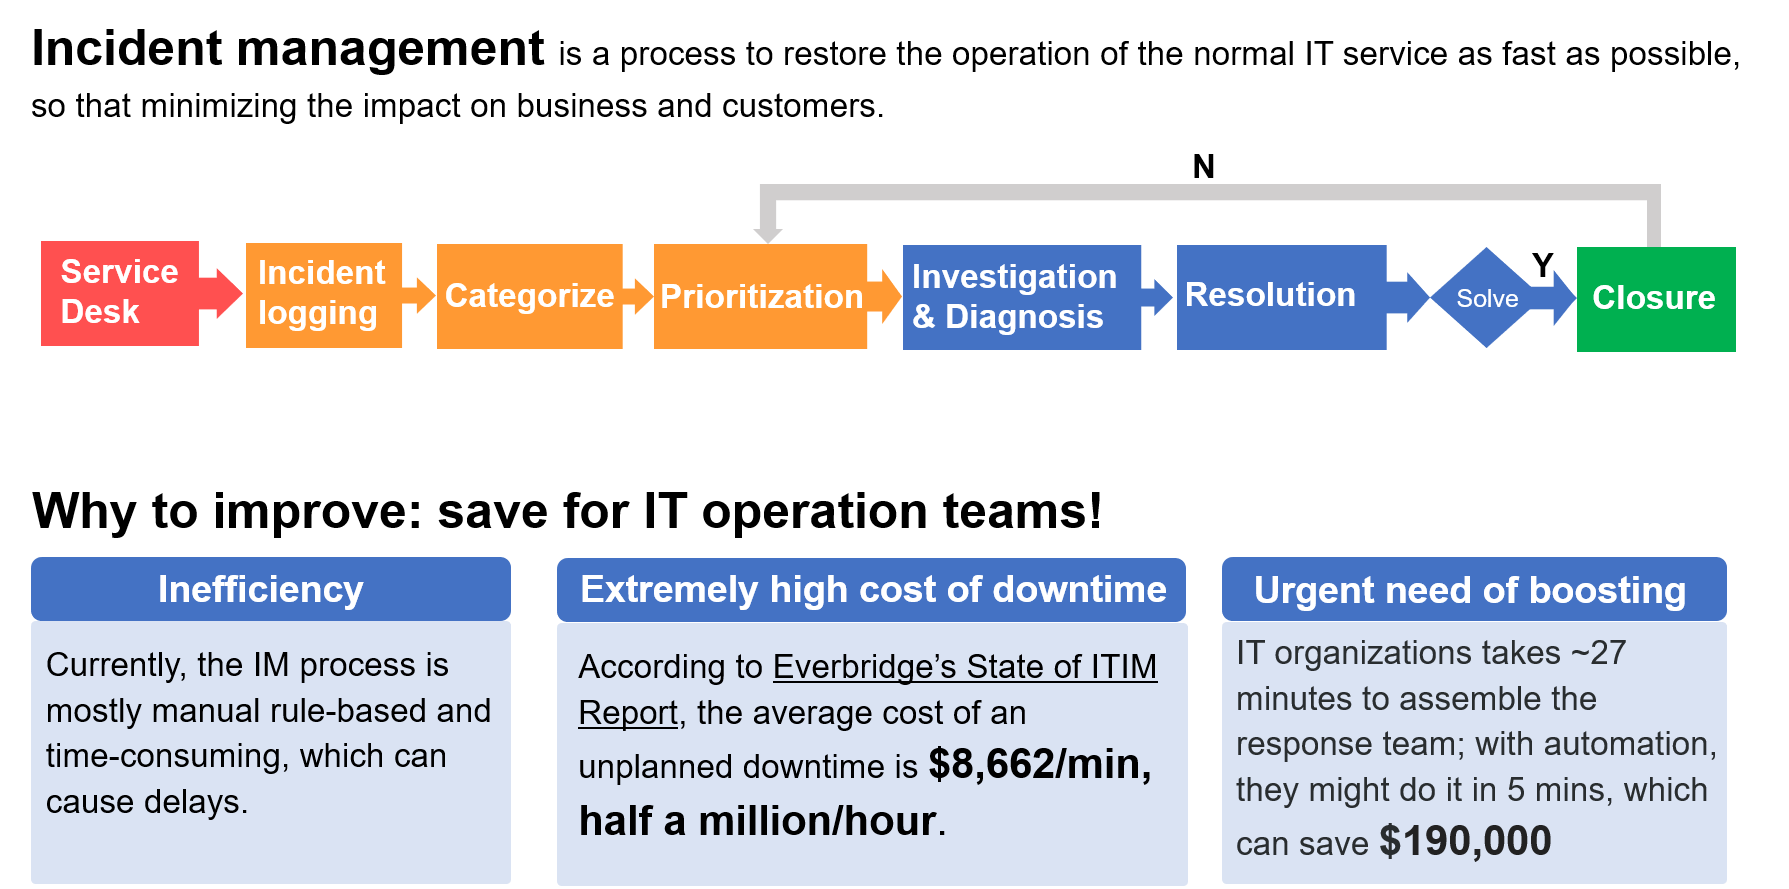



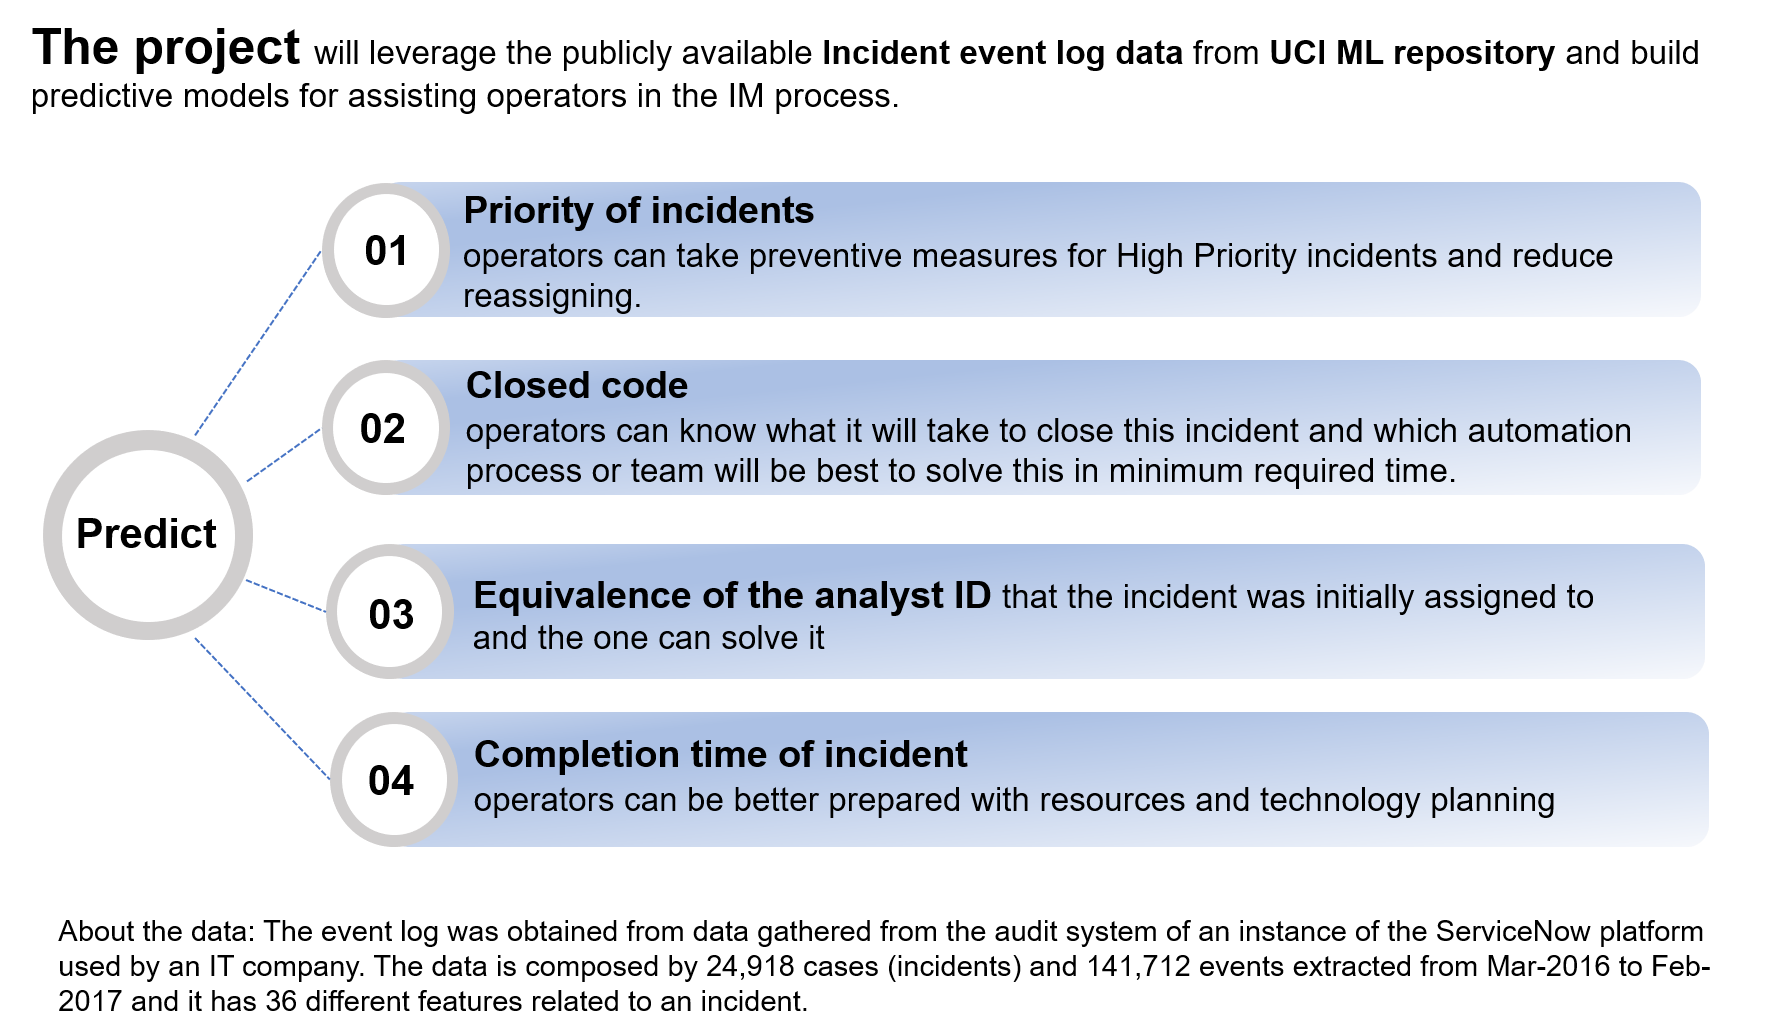



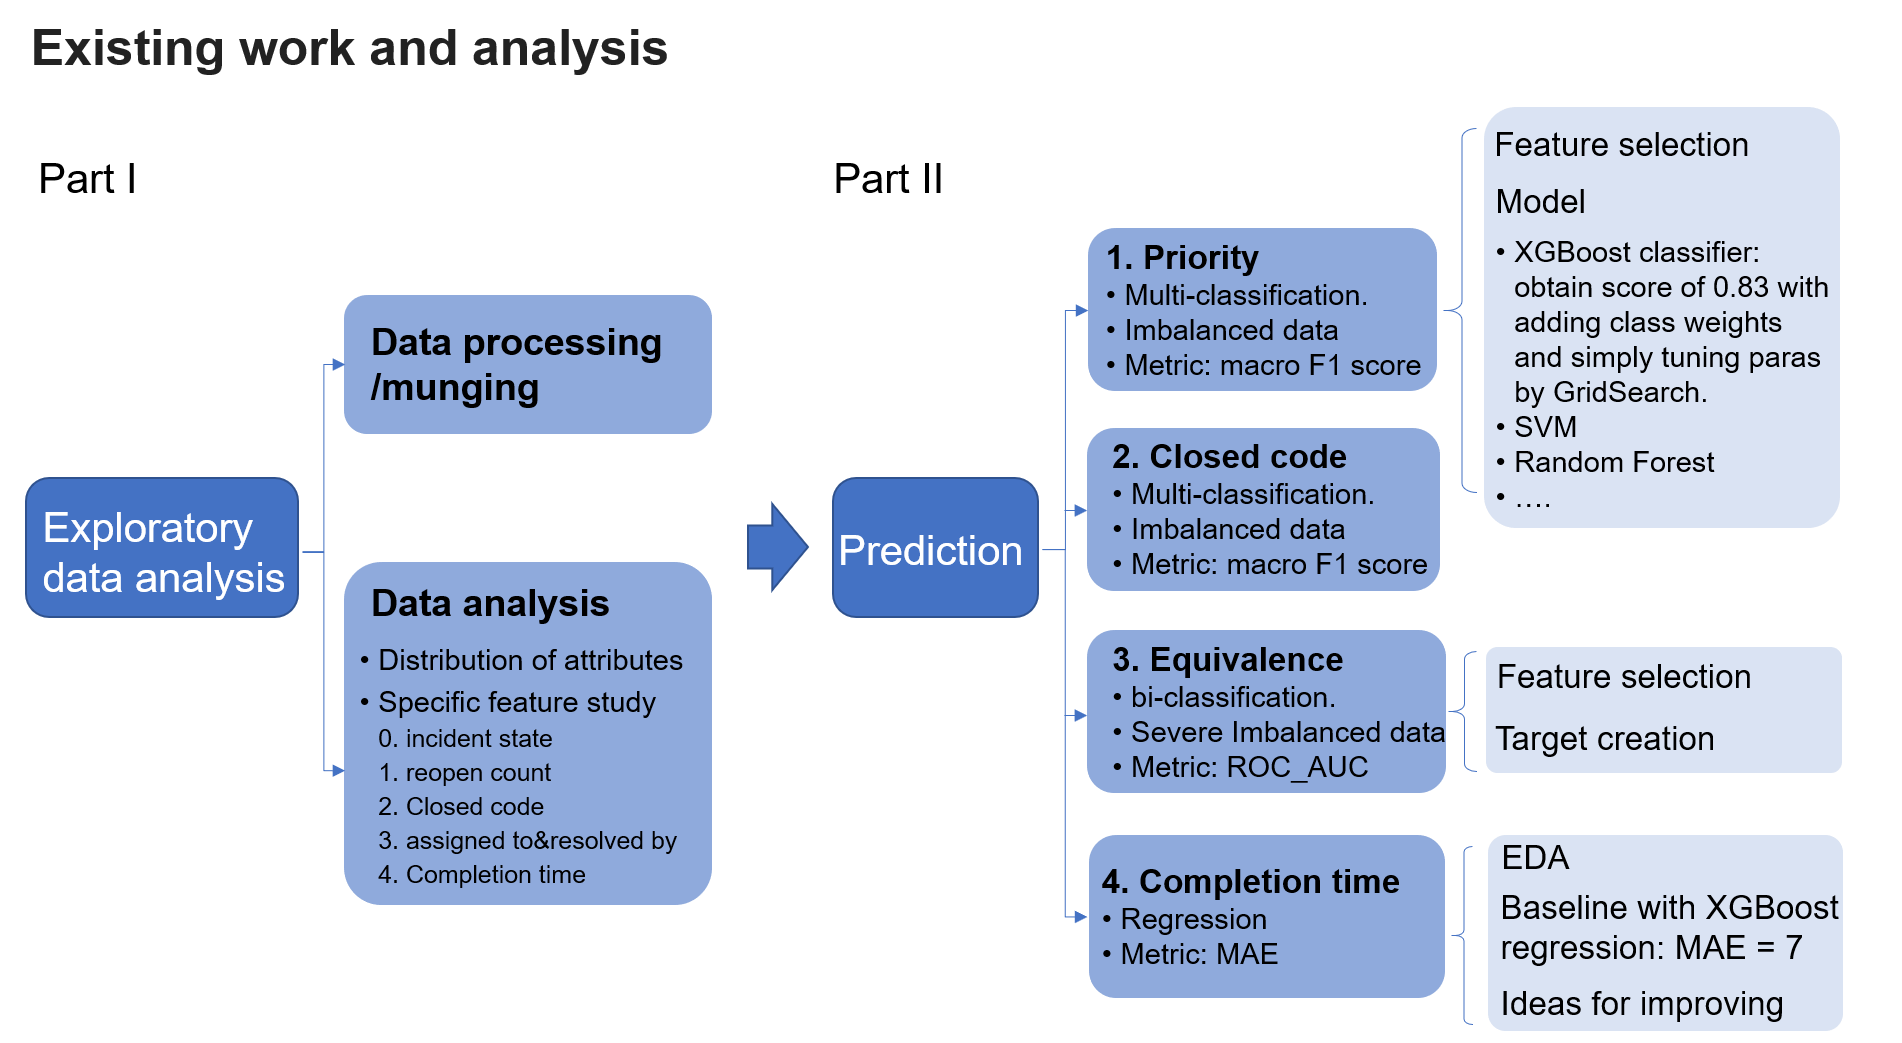

[http://archive.ics.uci.edu/ml/datasets/Incident+management+process+enriched+event+log](http://) 


**Import Raw Data**

In [2]:
df = pd.read_csv('../input/incident_event_logdata.csv',delimiter=',')

<font size="6.5">**Part 1**</font>
# **Exploratory Data Analysis**

In [3]:
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df.head(5)

There are 141712 rows and 36 columns


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


## Data processing / Data manipulating

In [4]:
# with the initial inspection, there are a lot of ? in data 
df.replace('?', np.NaN, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141683 non-null  object
 8   opened_by                136877 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           88636 non-null   object
 11  sys_created_at           88636 non-null   object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [5]:
# drop the columns that most values is nan
df1 = df.copy()
df1.drop(columns = ['cmdb_ci','problem_id','rfc','vendor','caused_by'], inplace = True)
# remove impact and urgency, since Priority value is directly computed from them.
df1.drop(columns = ['impact','urgency'], inplace = True)

In [6]:
# extract the numbers from the data 
pattern = r'(\d{1,4})'
colum = ['caller_id','opened_by','sys_created_by','sys_updated_by','location','category','subcategory','u_symptom','priority','assignment_group','assigned_to', 'closed_code', 'resolved_by']
for col in colum:
    df1[col] = df1[col].str.extract(pattern)

# time    
from datetime import datetime, date
timeColum = ['opened_at', 'sys_created_at','sys_updated_at','resolved_at','closed_at']    
for col in timeColum:
    df1[col] = pd.to_datetime(df1[col], format='%d/%m/%Y %H:%M',errors='coerce')

In [7]:
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 141712 rows and 29 columns


# **Data analysis**

## Distribution of columns

In [8]:
for col in df1.columns:
    print(col, df1[col].nunique())

number 24918
incident_state 9
active 2
reassignment_count 28
reopen_count 9
sys_mod_count 115
made_sla 2
caller_id 5244
opened_by 207
opened_at 19849
sys_created_by 185
sys_created_at 11552
sys_updated_by 846
sys_updated_at 50664
contact_type 5
location 224
category 58
subcategory 254
u_symptom 525
priority 4
assignment_group 78
assigned_to 234
knowledge 2
u_priority_confirmation 2
notify 2
closed_code 17
resolved_by 216
resolved_at 18505
closed_at 2707


<Figure size 432x288 with 0 Axes>

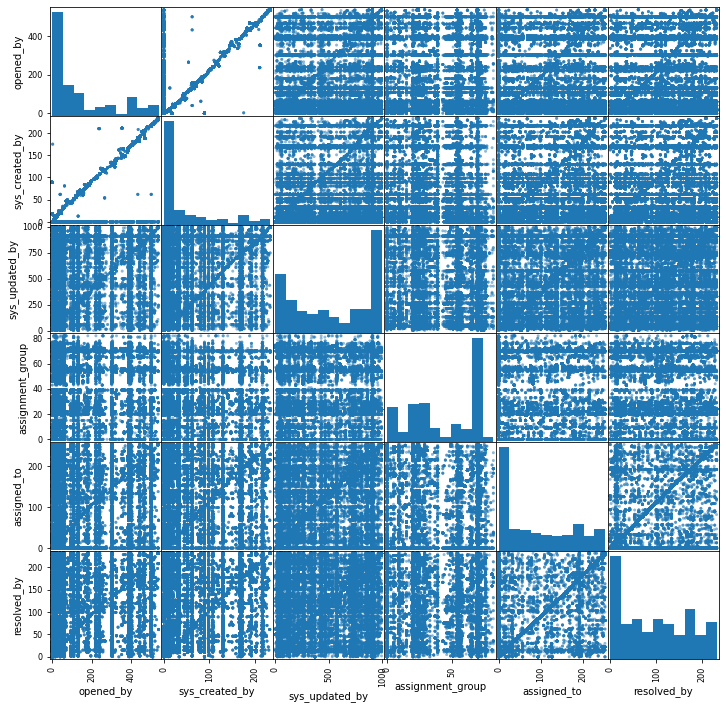

In [9]:
# Distribution and correlation among columns
#%matplotlib notebook
idencolum = ['opened_by','sys_created_by','sys_updated_by','assignment_group','assigned_to','resolved_by']    
df_identify = df1.loc[:, idencolum]
for col in idencolum:
    df_identify[col] = pd.to_numeric(df_identify[col], errors='coerce').fillna(0).astype(np.int64)
plt.figure()
pd.plotting.scatter_matrix(df_identify,figsize=(12,12))
plt.savefig(r"Distribution and correlation among features.png")

From the plot of scatter matrix, it can be observed that:
1. Identifier of the user who resolved the incident (resolved_by) is relative-uniformly distributed while the other features are inbalanced. 
2. It is clearly indicated that there is a linear correlation between 'opened_by' and 'sys_created_by': replicated information. 
3. A vague linear line is observed in the plot between 'assigned_to' and 'resolved_by', inferring that the correlation between these two features: some CI which was initially assigned to the incident is actually the one can reslove the incident.

<Figure size 432x288 with 0 Axes>

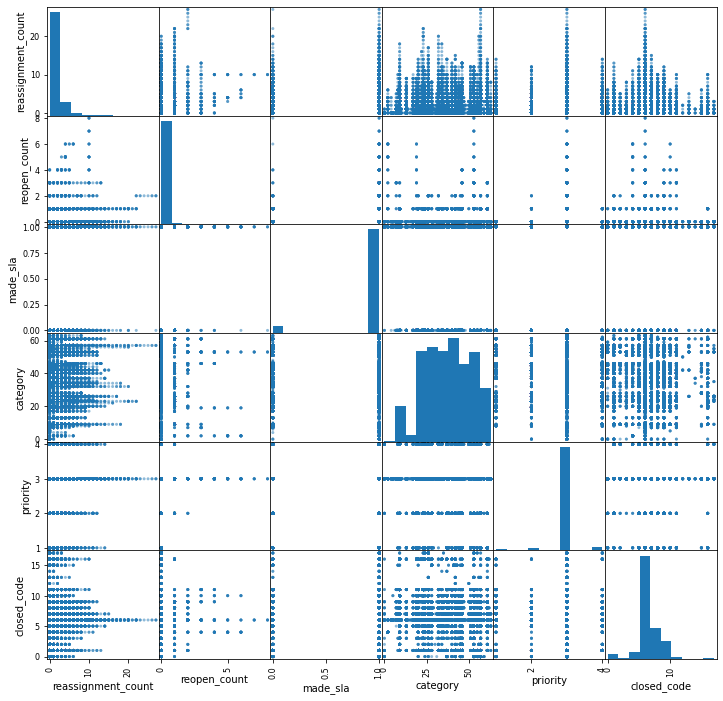

In [10]:
# continue 
othercolum = ['reassignment_count','reopen_count','made_sla','category','priority','closed_code']

df_other = df1.loc[:, othercolum]
for col in othercolum:
    df_other[col] = pd.to_numeric(df_other[col], errors='coerce').fillna(0).astype(np.int64)
plt.figure()
pd.plotting.scatter_matrix(df_other,figsize=(12,12))
plt.savefig(r"Distribution and correlation among features_2.png")

Comments based on this scatter matrix plot:
1. the most of reassignment_count and reopen_count is 0. 
2. about 90% instance have SLA (service level agreement).
3. Most cases are in priority 3, i.e. moderate. Therefore, the selection of the proper metrics is important for predicting the priority of incidents.
4. the dominated closed_code is about 6. 
5. Data is significatnly imbalanced.

## Specific Features Understanding

<font size="4.5">**0. incident_state**</font>


Text(0.5, 1.0, 'Distribution of the incident_state')

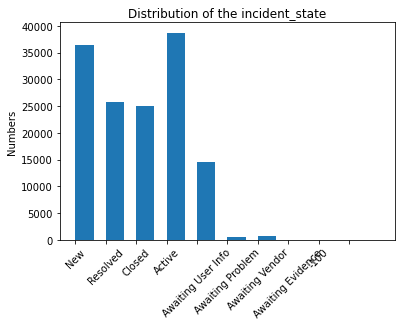

In [11]:
plt.figure()
bins = np.arange(0,df1.incident_state.nunique()+2,1)

ax = df1.incident_state.hist(width =0.6,bins= bins,figsize=(6,4),align='mid')
plt.xticks(rotation=45)
ax.grid(False)
ax.set_xticks(bins[:-1])
ax.set_ylabel('Numbers')
ax.set_title('Distribution of the incident_state')

From the figure, the incident can be in 7 different states as given time before it get closed. The number of 'New' and 'Active' is larger than the 'closed' case is because that the instance can be reopened in case incident resolution was rejected by the caller and in the data set there is a field i.e. reopen_count that captures the number of times got reopened.

<font size="4.5">**1.  relationship between made_sla and reopen_count**</font>

In [12]:
sla = (df1[(df1.made_sla == True) & (df1.reopen_count>0)].groupby('number')['reopen_count'].mean()).mean()
nosla = (df1[(df1.made_sla == False) & (df1.reopen_count>0)].groupby('number')['reopen_count'].mean()).mean()
print(f'mean reopen_count for having SLA {sla} and without SLA {nosla}')

mean reopen_count for having SLA 1.1109660413687132 and without SLA 1.2403846153846154


<font size="4.5">**2.  closed_code**</font>

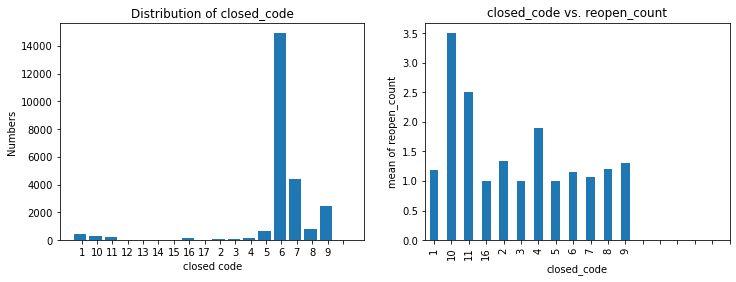

In [13]:
# Distribution of closed_code; relationship between close_code and reopen_count
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
bins=np.arange(0,df1.closed_code.nunique()+2,1)
df1[df1.incident_state=='Closed'].sort_values('closed_code').closed_code.hist(width =0.8,bins = bins,align='left',ax=ax1)
ax1.grid(False)
ax1.set_xticks(bins[:-1])
ax1.set_xlabel('closed code')
ax1.set_ylabel('Numbers')
ax1.set_title('Distribution of closed_code')


dfclosecode = df1[(df1.reopen_count>0) & (df1.incident_state=='Closed')]
dfclose_reopen = dfclosecode.groupby('closed_code').reopen_count.mean()
dfclose_reopen.plot.bar(ax=ax2)
ax2.grid(False)
ax2.set_ylabel('mean of reopen_count')
ax2.set_xticks(bins[:-1])
ax2.set_title('closed_code vs. reopen_count')
plt.show()

From this figure, it can be observed that:
1. the dominated closed_code is 6
2. the reopen_count is 0 for closed_code = 12,13,14,15.
3. the mean reopen_count is large for closed_code 10, which means the instance resolution is easily rejected for this closed_code.

<font size="4.5">**3.  assigned to and resolved by**</font>

In [14]:
df_ar = df1.loc[:,['assigned_to','resolved_by']]
df_ar['equal'] = np.where(df_ar.assigned_to == df_ar.resolved_by,1,0)
equal_num = df_ar['equal'].sum()
print(equal_num/df_ar.shape[0] * 100)

0.4078694817658349


Only 0.4% of the analyst that the incident was initially assigned to is actually the one can reslove it. Hence, an accurate prediction of 'resolved_by' can significantly improve the efficiency of the incidence management process.

<font size="4.5">**4. completion time for incident**</font>

Text(0.5, 1.0, 'Distribution of completion_time')

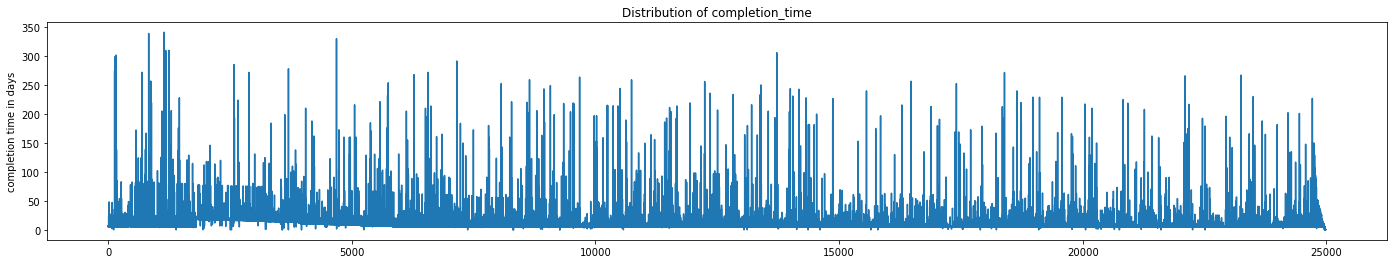

In [15]:
# completion time for incident resolution 
df_closed = df1[df1.incident_state=='Closed'].reset_index()
df_closed['completion_time_days'] = (df_closed.closed_at- df_closed.opened_at).dt.total_seconds()/3600/24
#print(f'The mean of completion time for incident resolution is {df_closed.completion_time_days.mean()} days.')

#plots
plt.figure()
ax = df_closed['completion_time_days'].plot(figsize=(24,4))
ax.grid(False)
ax.set_ylabel('completion time in days')
ax.set_title('Distribution of completion_time')

In [16]:
df_closed['completion_time_days'].describe()

count    24985.000000
mean        13.206713
std         22.372705
min          0.000000
25%          5.040972
50%          6.084028
75%         13.343750
max        341.275694
Name: completion_time_days, dtype: float64

<Figure size 432x288 with 0 Axes>

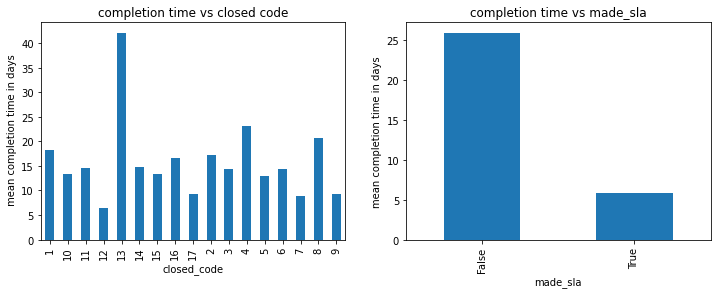

In [17]:
# completion time vs closed code; completion time vs made_sla

plt.figure()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
df_closecode_time = df_closed.groupby('closed_code')['completion_time_days'].mean()
df_closecode_time.plot.bar(ax=ax1)
ax1.grid(False)
ax1.set_ylabel(' mean completion time in days')
ax1.set_title('completion time vs closed code')

df_made_sla_time = df_closed.groupby('made_sla')['completion_time_days'].mean()
df_made_sla_time.plot.bar(ax=ax2)
ax2.grid(False)
ax2.set_ylabel('mean completion time in days')
ax2.set_title('completion time vs made_sla')
plt.show()

This figure indicates that:
1. For closed_code of 13, the mean completion time is about 40 days, which is much larger than the others. This observation is unexpected since its reopen_count is 0 based on previous plot. 
2. The mean completion time for the instances without SLA is much longer than those having SLA. Therefore, making SLA would be helpful for enhancing the efficiency of incident management process.

<font size="6.5">**Part 2**</font>

# 1. Predict the priority of incidents

1. Multi-classfication problem.
2. it is found that the priority can be different for the same incident, so every event should be analyzed. 
3. recall that most incidents (93%) has the priority of moderate. Hence, (1) sampling; (2) remedies for imbalance by selecting and adjusting model; (3) select proper metrics for evaluation:F1_score, AUC-ROC.  

## Feature selection

Only the features which are available when the tickets arrives can be used to predict priority, which can be 'made_sla', 'caller_id', 'contact_type', 'location','category', 'subcategory','u_symptom'.


In [18]:
X = df1[['made_sla', 'caller_id', 'contact_type', 'location','category', 'subcategory','u_symptom']]
y = df1.priority
#X.head(2)

In [19]:
for col in ['caller_id','location','category', 'subcategory','u_symptom']:
    X.loc[:,col] = pd.to_numeric(X.loc[:,col], errors='coerce').fillna(0).astype(np.int64)

# Label Encoding
enc= LabelEncoder()
for col in ['made_sla', 'contact_type']:
    X.loc[:,col] = enc.fit_transform(X.loc[:,col])
X.head(2)
y = pd.to_numeric(y, errors='coerce').fillna(0).astype(np.int64)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
# Splitting the data into test and train 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

## Models

In [21]:
from sklearn.metrics import roc_curve, auc
# baseline, accuracy and confusion matrix of predicting 3 for all incidents 
print(f' The baseline of accuracy is {accuracy_score(y_test, np.full(y_test.shape, 3))}')
print(classification_report(y_test,np.full(y_test.shape, 3)))

 The baseline of accuracy is 0.9342804723150021
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       685
           2       0.00      0.00      0.00       894
           3       0.93      1.00      0.97     39720
           4       0.00      0.00      0.00      1215

    accuracy                           0.93     42514
   macro avg       0.23      0.25      0.24     42514
weighted avg       0.87      0.93      0.90     42514



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<font size="4.5">**1. XGBoost Classfier**</font>

To deal with the class imbalance
(1) cross-validate and perform grid-search to find the best parameter settings for the model;
(2) balance class weights.

<font size="4">0: initial model</font>

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_predict_xgb = model_xgb.predict(X_test)

In [23]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
f1 = f1_score(y_test,y_predict_xgb,average='macro')
print(f'The macro F1 score for initial XGB model:{f1}')
print(classification_report(y_test,y_predict_xgb))

The macro F1 score for initial XGB model:0.6496525054457857
              precision    recall  f1-score   support

           1       0.84      0.34      0.49       685
           2       0.81      0.47      0.59       894
           3       0.96      1.00      0.98     39720
           4       0.85      0.40      0.54      1215

    accuracy                           0.96     42514
   macro avg       0.86      0.55      0.65     42514
weighted avg       0.95      0.96      0.95     42514



<font size="4">1: Add class weights on the training data</font>

In [24]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight('balanced',np.unique(y_train), y_train))

w_array = np.ones(y_train.shape[0], dtype = 'float')
for i, val in enumerate(y_train):
    w_array[i] = class_weights[val-1]

model_xgb_weight = XGBClassifier()   
model_xgb_weight.fit(X_train, y_train,sample_weight=w_array)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=[1 2 3 4], y=37776     3
1872      4
3103      3
39777     3
10188     3
47453     3
122775    3
49707     3
127162    3
103323    3
27609     3
98282     3
113564    3
10625     3
89179     3
21347     3
63892     3
128043    3
125792    3
125769    3
83310     3
135793    3
123119    2
43513     3
132713    3
18966     3
89949     2
103904    3
116836    3
137136    3
137219    3
76912     3
90214     3
83067     3
20667     3
69648     3
126233    3
17821     3
136979    3
29765     3
10695     3
71357     3
64928     3
73517     3
243       3
82901     3
129641    3
120144    3
133696    3
57391     3
21447     3
104668    3
39071     3
108524    3
17454     3
20009     3
21822     3
117089    3
119857    3
88151     1
112452    3
26407     3
61937     3
70842     3
48267     3
98269     3
123115    3
14005     4
66482     3
54381     3
74582     3
129634    3
115656    4
57484     3


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
# Predicting the model
y_predict_xgb_weight = model_xgb_weight.predict(X_test) 
f1 = f1_score(y_test,y_predict_xgb_weight,average='macro')
print(f'The F1 score for XGB_weighted model:{f1}')
print(classification_report(y_test,y_predict_xgb_weight))

The F1 score for XGB_weighted model:0.5608071653756121
              precision    recall  f1-score   support

           1       0.23      0.92      0.37       685
           2       0.37      0.90      0.52       894
           3       0.99      0.85      0.92     39720
           4       0.29      0.86      0.43      1215

    accuracy                           0.85     42514
   macro avg       0.47      0.88      0.56     42514
weighted avg       0.95      0.85      0.89     42514



Even the macro F1_score decreases, but the recall is improved a lot. Next, try to use gridsearch to tuning paras. 

<font size="4">2: Gridsearch</font>

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

para_search ={'learning_rate':[0.2, 0.6, 1.2], 'n_estimators':[600, 800, 1200]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
grid_search = GridSearchCV(model_xgb_weight, param_grid = para_search, scoring='f1_macro',cv=kfold)
grid_search.fit(X_train, y_train,sample_weight=w_array)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=10, shuffle=True),
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='multi:softprob', random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     s

In [27]:
print(grid_search.best_params_)
y_decision_fn = grid_search.predict(X_test) 
f1 = f1_score(y_test,y_decision_fn,average='macro')
print(f'The F1 score for XGB_weighted model after 1st tuning:{f1}')
print(classification_report(y_test,y_decision_fn))

{'learning_rate': 1.2, 'n_estimators': 1200}
The F1 score for XGB_weighted model after 1st tuning:0.8336553971045673
              precision    recall  f1-score   support

           1       0.60      0.92      0.73       685
           2       0.74      0.90      0.81       894
           3       1.00      0.97      0.99     39720
           4       0.72      0.93      0.81      1215

    accuracy                           0.97     42514
   macro avg       0.76      0.93      0.83     42514
weighted avg       0.98      0.97      0.97     42514



With simple trials, the macro F1 score increases from 0.65 to 0.83. 


<font size="4">3: Feature importance analysis</font>

[0.07020121 0.14630637 0.06557558 0.16339569 0.20719746 0.194995
 0.15232863]


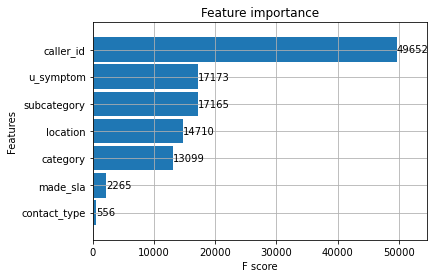

In [28]:
# plot feature importance
from xgboost import plot_importance
model_grid = grid_search.best_estimator_
_ = plot_importance(model_grid, height = 0.9)
print(model_grid.feature_importances_)

Future work:
1. continue tuning paras 
2. transfer to onevsall data, then use 'scale_pos_weight' to scale the class weights in the classifier.
3. try roc_auc metric in the grid search.

<font size="4.5">**2. Support Vector Machine**</font>

(1) might be inproper since data size is large. scale feature is required; 
(2) with cost sensitive training: unequal costs for each class by setting class_weight : {dict, 'balanced'}. 

In [29]:
# Standardization technique
sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train)
X_test_svm = sc.transform(X_test)

In [ ]:
#Initial model 
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf',C=10,gamma=0.1).fit(X_train_svm,y_train)

<font size="4.5">**3. Thoughts on future trials**</font>
1. Bagging With Random Undersampling: BalancedBaggingClassifier
2. Random Forest With Class Weighting; Random Forest With Random Undersampling.
3. EasyEnsembleClassifier.

# 2. Predict the closed code

1. closed code:identifier of the resolution of the incident. Hence, it should be analyzed for each incident. 
2. imbalanced data. 17 classes.
3. multi-classfication problem. 

## Feature selection

The purpose of the prediction is the operators can know what it will take to close this incident as soon ticket comes. Therefore, the features which are available when the tickets arrives is reasonable for the prediction, which can be 'made_sla', 'caller_id', 'contact_type', 'location','category', 'subcategory','u_symptom'. 


# 3. Predict equivalence of the analyst ‘assigned to’ and 'resolved by'

1. bi-classfication problem.
2. Each event need to be analyzed.
3. Severe imbalanced data. 
4. Start with Random Forest and GBM, and use class weights. Use ROC_AUC as metrics.    

## Feature selection and target creation

1. First trial: 'incident_state', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'sys_updated_by', 'location', 'category', 'subcategory','u_symptom', 'priority', 'assignment_group', 'knowledge', 'u_priority_confirmation'.

2. create the target 'ident_equal' which specifies, if 'assigned to' was really responsible for the incident occurrence or not.   

In [ ]:
# create target
df_ar = df1[['assigned_to','resolved_by']]
y2 = np.where(df_ar.assigned_to == df_ar.resolved_by,1,0)

# 4. Predict the completion time for incident

1. Regression problem.
2. Each incident has a completion time, so it should be analyzed for each incident.
3. use MAE as metrics. 


## Exploratory data analysis

In [ ]:
df_closed.head(2)

In [ ]:
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
# tick on sundays every week
loc = mdates.WeekdayLocator(byweekday=SU)

plt.figure()
df_opened_at_time = df_closed.groupby('opened_at')['completion_time_days'].mean()
axt = df_opened_at_time.plot(figsize=(20, 4))
axt.xaxis.set_minor_locator(loc)
axt.set_ylabel('mean completion time in days')
axt.set_xlabel('opened_at time')
plt.show()

1. mean completion time decrease with the time, so can create a feature measuring the days from 2016-02-29. 
2. clear pattern for every week.

In [ ]:
df_closed['open_month'] = df_closed.opened_at.dt.month
df_closed['open_year'] = df_closed.opened_at.dt.year
df_closed['open_day'] = df_closed.opened_at.dt.day

In [ ]:
plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(15,3))
df_open_year_time = df_closed.groupby('open_year')['completion_time_days'].mean()
df_open_year_time.plot.bar(ax=ax1)
ax1.grid(False)
ax1.set_ylabel('Mean completion time in days')
ax1.set_xlabel('Year')

df_open_month_time = df_closed.groupby('open_month')['completion_time_days'].mean()
df_open_month_time.plot(ax=ax2)
ax2.grid(False)
ax2.set_xlabel('Month')

df_open_day_time = df_closed.groupby('open_day')['completion_time_days'].mean()
df_open_day_time.plot(ax=ax3)
ax3.grid(False)
ax3.set_xlabel('day')
plt.show()

**Recall from previous EDA:**
(1) For closed_code of 13, the mean completion time is about 1000 hours, which is relative large compared to the others; 
(2) The mean completion time for the instances without SLA is much longer than those having SLA. Therefore, making SLA would be helpful for enhancing the efficiency of incident management process.

In [ ]:
# time difference between resolved_at and closed_at 
df_closed['resolved_closed'] = ((df_closed.closed_at- df_closed.resolved_at).dt.total_seconds()/3600/24).fillna(0)
print(f'The mean time difference between resolved_at and closed_at is {df_closed.resolved_closed.mean()} days.')

#plots
plt.figure()
ax = df_closed['resolved_closed'].plot(figsize=(10,4))
ax.grid(False)
ax.set_ylabel('time difference in days')

The attribute resolved_at is highly correlated withclosed_at, use it might cause data leakage. 

## Quick Baseline with XGBoost regression 
Here, use the following features (Expert-Driven Selection) to make a quick baseline solution for the problem: 'category','subcategory', 'priority','caller_id','made_sla'.

Note the target is 'completion time'.

In [ ]:
y3 = df_closed.completion_time_days
X3 = df_closed[['category','subcategory', 'priority','caller_id','made_sla']]
# Label Encoding
# enc= LabelEncoder()
# X3['incident_state'] = enc.fit_transform(X3['incident_state'])
for col in ['category','subcategory', 'priority','caller_id']:
    X3[col] = pd.to_numeric(X3[col], errors='coerce').fillna(0).astype(np.int64)

In [ ]:
# Splitting the data into test and train 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.3,random_state=10)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

xg_reg = xgb.XGBRegressor(max_depth = 10, min_child_weight=0.5, subsample = 1, eta = 0.3, num_round = 500, seed = 1)
xg_reg.fit(X3_train, y3_train, eval_metric='mae')
y3_preds = xg_reg.predict(X3_test)

In [ ]:
y3_preds[y3_preds <0] = 0
mae = mean_absolute_error(y3_test.values, y3_preds)
print("MAE: %f" % (mae))

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(y3_test.values,label="y3_test")
plt.plot(y3_preds,label="y3_preds")
plt.legend(loc='upper left') 

The MAE is large but the plot seems not too bad. The large error comes from the prediction when the completion time is large.

## Ideas

<font size="4.5">**Idea 0: Dig into the cases that completion time is large**</font>

<font size="4.5">**Idea 1: Add the time difference between opened time and 2016-02-29**</font>

<font size="4.5">**Idea 2: Add the 'day' of the open time in a month**</font>

<font size="4.5">**Idea 3: Add the 'day' of the open time in a week**</font>

<font size="4.5">**Idea 4: Mean encodings: mean completion time corresponding to the month it opened.**</font>